# 자연어 처리(Natural Language Processing, NLP)

- 한국어, 영어 등 우리가 평소에 쓰는 언어

- 사람의 말을 컴퓨터가 이해하도록 수행하는 과정

## 신경망에서의 단어 처리 (단어 임베딩, Word Embedding)
- 단어를 있는 그대로 처리하지 않고 고정 길이의 벡터로 표현 (원-핫 인코딩)

- 단어 하나에 인덱스 정수를 할당하는 Bag of Words 방법

- 예시)  
  "you", "are", "not", "a", "smart", "student"

  - "you"     : 0
  - "are"     : 1
  - "not"     : 2
  - "a"       : 3
  - "smart"   : 4
  - "student" : 5

        "You are a smart student."  
    ---> [1, 1, 0, 1, 1, 1]

  <br>
  
  <img src="https://miro.medium.com/max/1348/1*YEJf9BQQh0ma1ECs6x_7yQ.png" width="600">

  <sub>출처: https://medium.com/@athif.shaffy/one-hot-encoding-of-text-b69124bef0a7</sub>

## 신경망에서의 단어처리 구조

<img src="https://miro.medium.com/max/1000/1*1O5gLhOg25HviI8bwZxV4g.png" width="600">

<sub>출처: https://mc.ai/deep-nlp-word-vectors-with-word2vec/</sub>

## CBOW (Continuous Bag of Words) Embedding
- 복수 단어 문맥(multi-word context)에 대한 문제  
  즉, 여러개의 단어를 나열한 뒤 이와 관련된 단어를 추정하는 문제

- 예를 들어,  
      Betty bought a bit of better butter.

  위 예시에서 (Betty, a bit, butter)라는 문맥이 주어지면 bought를 예측하는 구조

  <br>

  <img src="https://miro.medium.com/max/604/1*DfuBd49nCtT99h328iXL2Q.png" width="300">

  <sub>출처: https://medium.com/@srishtee.kriti/mathematics-behind-continuous-bag-of-words-cbow-model-1e54cc2ecd88</sub>

## Skip-Gram Embedding
- CBOW 방식과 반대

- 특정한 단어로부터 문맥이 될 수 있는 단어를 예측

- 보통 입력 단어 주변의  $k$ 개 단어를 문맥으로 보고 예측 모형을 만드는데 이  $k$ 값을 window size 라고 한다.

- 예시) window size = 2 라면,  
      Betty -> bought, butter  
      bought -> butter, Betty  
      a -> bit, of  

  <br>

  <img src="https://www.researchgate.net/publication/322905432/figure/fig1/AS:614314310373461@1523475353979/The-architecture-of-Skip-gram-model-20.png" width="300">

  <sub>출처: https://www.researchgate.net/figure/The-architecture-of-Skip-gram-model-20_fig1_322905432</sub>

## Word2Vec
- CBOW, Skip_Gram 방식의 단어 임베딩을 구현.  
  구글의 Mikolov 개발

- subsampling, negative sampling 등의 기법 추가하여 학습 속도 향상

  <img src="https://mbenhaddou.com/wp-content/uploads/2019/12/img_4.png">

  <sub>출처: http://mbenhaddou.com/2019/12/14/word2vec-concepts-from-scratch/</sub>

  <br>

  <img src="https://miro.medium.com/max/2456/1*gcC7b_v7OKWutYN1NAHyMQ.png" width="600">

  <sub>출처: https://towardsdatascience.com/word-embeddings-for-nlp-5b72991e01d4</sub>

## Word2Vec 예제

- 출처: https://datascienceschool.net/view-notebook/6927b0906f884a67b0da9310d3a581ee/

In [38]:
import nltk
nltk.download("movie_reviews")
nltk.download("punkt")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\kksoo\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kksoo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
from nltk.corpus import movie_reviews
sentences = [list(s) for s in movie_reviews.sents()]

In [40]:
sentences[0]

['plot',
 ':',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 ',',
 'drink',
 'and',
 'then',
 'drive',
 '.']

In [41]:
from gensim.models.word2vec import Word2Vec

In [42]:
model = Word2Vec(sentences=sentences)

In [43]:
model.wv.similarity("fruit", "apple")

0.8481497

In [44]:
model.wv.most_similar("he")

[('she', 0.8413031697273254),
 ('everyone', 0.6501651406288147),
 ('him', 0.6501197218894958),
 ('himself', 0.6439862847328186),
 ('nobody', 0.5907591581344604),
 ('it', 0.584542453289032),
 ('death', 0.5843856930732727),
 ('someone', 0.5836366415023804),
 ('everything', 0.5804645419120789),
 ('chance', 0.5242921113967896)]

In [45]:
model.wv.most_similar(positive=["she", "king"], negative="queen", topn=1)

[('he', 0.7233633399009705)]

### 네이버 영화 감상 코퍼스를 사용한 한국어 단어 임베딩
- 한국어 임베딩은 "konlpy" 필요

In [62]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [47]:
import requests

URL = "http://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt"
response = requests.get(URL)
print(response)

with open("ratings_train.txt", "w", encoding="utf-8") as file:
    file.write(response.text)

<Response [200]>


In [48]:
import codecs

def read_data(filename):
    with codecs.open(filename, encoding="utf-8", mode="r") as f:
        data = [line.split("\t") for line in f.read().splitlines()]
        data = data[1:]
    
    return data

train_data = read_data("ratings_train.txt")

In [49]:
!pip install konlpy

In [50]:
from konlpy.tag import Okt

tagger = Okt()

def tokenize(doc):
    return ["/".join(t) for t in tagger.pos(doc, norm=True, stem=True)] # 형태소와 품사를 튜플로 묶어 반환한 뒤, /을 기준으로 병합

train_docs = [row[1] for row in train_data]

train_docs

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

In [51]:
sentences = [tokenize(d) for d in train_docs]

sentences

[['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 ['흠/Noun',
  '.../Punctuation',
  '포스터/Noun',
  '보고/Noun',
  '초딩/Noun',
  '영화/Noun',
  '줄/Noun',
  '..../Punctuation',
  '오버/Noun',
  '연기/Noun',
  '조차/Josa',
  '가볍다/Adjective',
  '않다/Verb'],
 ['너/Modifier',
  '무재/Noun',
  '밓었/Noun',
  '다그/Noun',
  '래서/Noun',
  '보다/Verb',
  '추천/Noun',
  '한/Josa',
  '다/Adverb'],
 ['교도소/Noun',
  '이야기/Noun',
  '구먼/Noun',
  '../Punctuation',
  '솔직하다/Adjective',
  '재미/Noun',
  '는/Josa',
  '없다/Adjective',
  '../Punctuation',
  '평점/Noun',
  '조정/Noun'],
 ['사이/Modifier',
  '몬페/Noun',
  '그/Determiner',
  '의/Noun',
  '익살스럽다/Adjective',
  '연기/Noun',
  '가/Josa',
  '돋보이다/Verb',
  '영화/Noun',
  '!/Punctuation',
  '스파이더맨/Noun',
  '에서/Josa',
  '늙다/Verb',
  '보이다/Verb',
  '하다/Verb',
  '커스틴/Noun',
  '던스트/Noun',
  '가/Josa',
  '너무나도/Adverb',
  '이쁘다/Adjective',
  '보이다/Verb'],
 ['막/Noun',
  '걸음/Noun',
  '마/Noun',
  '떼다/Verb',
  '3/Number',
  '세/Noun',
  '부터/Josa',
  '초등학교/Noun',

In [52]:
from gensim.models import word2vec

In [53]:
model = word2vec.Word2Vec(sentences)
model.init_sims(replace=True) # 학습 이후 필요 없는 메모리 제거

C:\Users\kksoo\AppData\Local\Temp\ipykernel_11196\1530401504.py:2: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True) # 학습 이후 필요 없는 메모리 제거


In [54]:
model.wv.similarity(*tokenize("배우 감독"))

0.3018849

In [55]:
model.wv.most_similar(tokenize("감독"))

[('작가/Noun', 0.6799156069755554),
 ('능력/Noun', 0.5590119361877441),
 ('목사/Noun', 0.5553798079490662),
 ('본인/Noun', 0.5286078453063965),
 ('추기경/Noun', 0.5277462005615234),
 ('교수/Noun', 0.5256637334823608),
 ('김기덕/Noun', 0.5211443901062012),
 ('각본/Noun', 0.5196003317832947),
 ('영화감독/Noun', 0.5160779356956482),
 ('역량/Noun', 0.5049415230751038)]

In [56]:
from konlpy.utils import pprint

pprint(model.wv.most_similar(positive=tokenize("남자 여배우"), negative=tokenize("배우"), topn=1))

[('여자/Noun', 0.7911098003387451)]


In [57]:
model.wv.key_to_index

{'./Punctuation': 0,
 '영화/Noun': 1,
 '하다/Verb': 2,
 '이/Josa': 3,
 '보다/Verb': 4,
 '의/Josa': 5,
 '../Punctuation': 6,
 '가/Josa': 7,
 '에/Josa': 8,
 '을/Josa': 9,
 '.../Punctuation': 10,
 '도/Josa': 11,
 '은/Josa': 12,
 '들/Suffix': 13,
 ',/Punctuation': 14,
 '는/Josa': 15,
 '없다/Adjective': 16,
 '를/Josa': 17,
 '있다/Adjective': 18,
 '좋다/Adjective': 19,
 '너무/Adverb': 20,
 '?/Punctuation': 21,
 '이/Determiner': 22,
 '재밌다/Adjective': 23,
 '정말/Noun': 24,
 '것/Noun': 25,
 '되다/Verb': 26,
 '!/Punctuation': 27,
 '진짜/Noun': 28,
 '같다/Adjective': 29,
 '적/Suffix': 30,
 '으로/Josa': 31,
 '이/Noun': 32,
 '점/Noun': 33,
 '아니다/Adjective': 34,
 '않다/Verb': 35,
 '로/Josa': 36,
 '에서/Josa': 37,
 '만/Josa': 38,
 '만들다/Verb': 39,
 '연기/Noun': 40,
 '나오다/Verb': 41,
 '평점/Noun': 42,
 '과/Josa': 43,
 '최고/Noun': 44,
 '~/Punctuation': 45,
 '한/Josa': 46,
 '이다/Verb': 47,
 '왜/Noun': 48,
 '스토리/Noun': 49,
 '생각/Noun': 50,
 '..../Punctuation': 51,
 '인/Josa': 52,
 '드라마/Noun': 53,
 '다/Adverb': 54,
 '다/Josa': 55,
 '이다/Josa': 56,
 '감동/Noun': 57,
 

In [58]:
review_vocab = {token: idx for token, idx in model.wv.key_to_index.items()}
review_vectors = [model.wv[token] for token in review_vocab.keys()]

review_vectors

[array([-0.04441555, -0.04496052, -0.09399178, -0.11143601, -0.06366643,
        -0.1897873 , -0.00459414,  0.10774134,  0.04533366,  0.00958201,
         0.2930807 ,  0.20303108,  0.02380237,  0.03386451, -0.24506098,
        -0.11180598,  0.01873131,  0.18154964, -0.09446439, -0.13599907,
         0.08000404, -0.01804318,  0.16330032,  0.08435617,  0.03900845,
        -0.12166207, -0.01448108,  0.03319552,  0.09530332,  0.01521161,
        -0.01411343,  0.10430758,  0.02361325, -0.05583792,  0.19019568,
        -0.06253714, -0.03382026,  0.03342117, -0.00038438,  0.01148544,
        -0.09857252, -0.11572263, -0.09258456, -0.08863233, -0.06587464,
         0.05147918,  0.00182799,  0.00960475, -0.09185763,  0.20922169,
        -0.17113514,  0.05941   , -0.15037379,  0.09257614, -0.10433202,
        -0.10692321, -0.10924408, -0.10327958,  0.00836351,  0.04544499,
         0.1326574 , -0.04535327, -0.13346463, -0.18892631,  0.15179981,
         0.03299651, -0.06428354,  0.03824408,  0.0

In [59]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

tsne = TSNE(n_components=2)
similarity = tsne.fit_transform(np.array(review_vectors))
review_df = pd.DataFrame(similarity, index=review_vocab, columns=["x", "y"])
review_1000 = review_df[:1000]

(-77.50511016845704, 74.45065155029297, -84.03271789550782, 78.06393737792969)

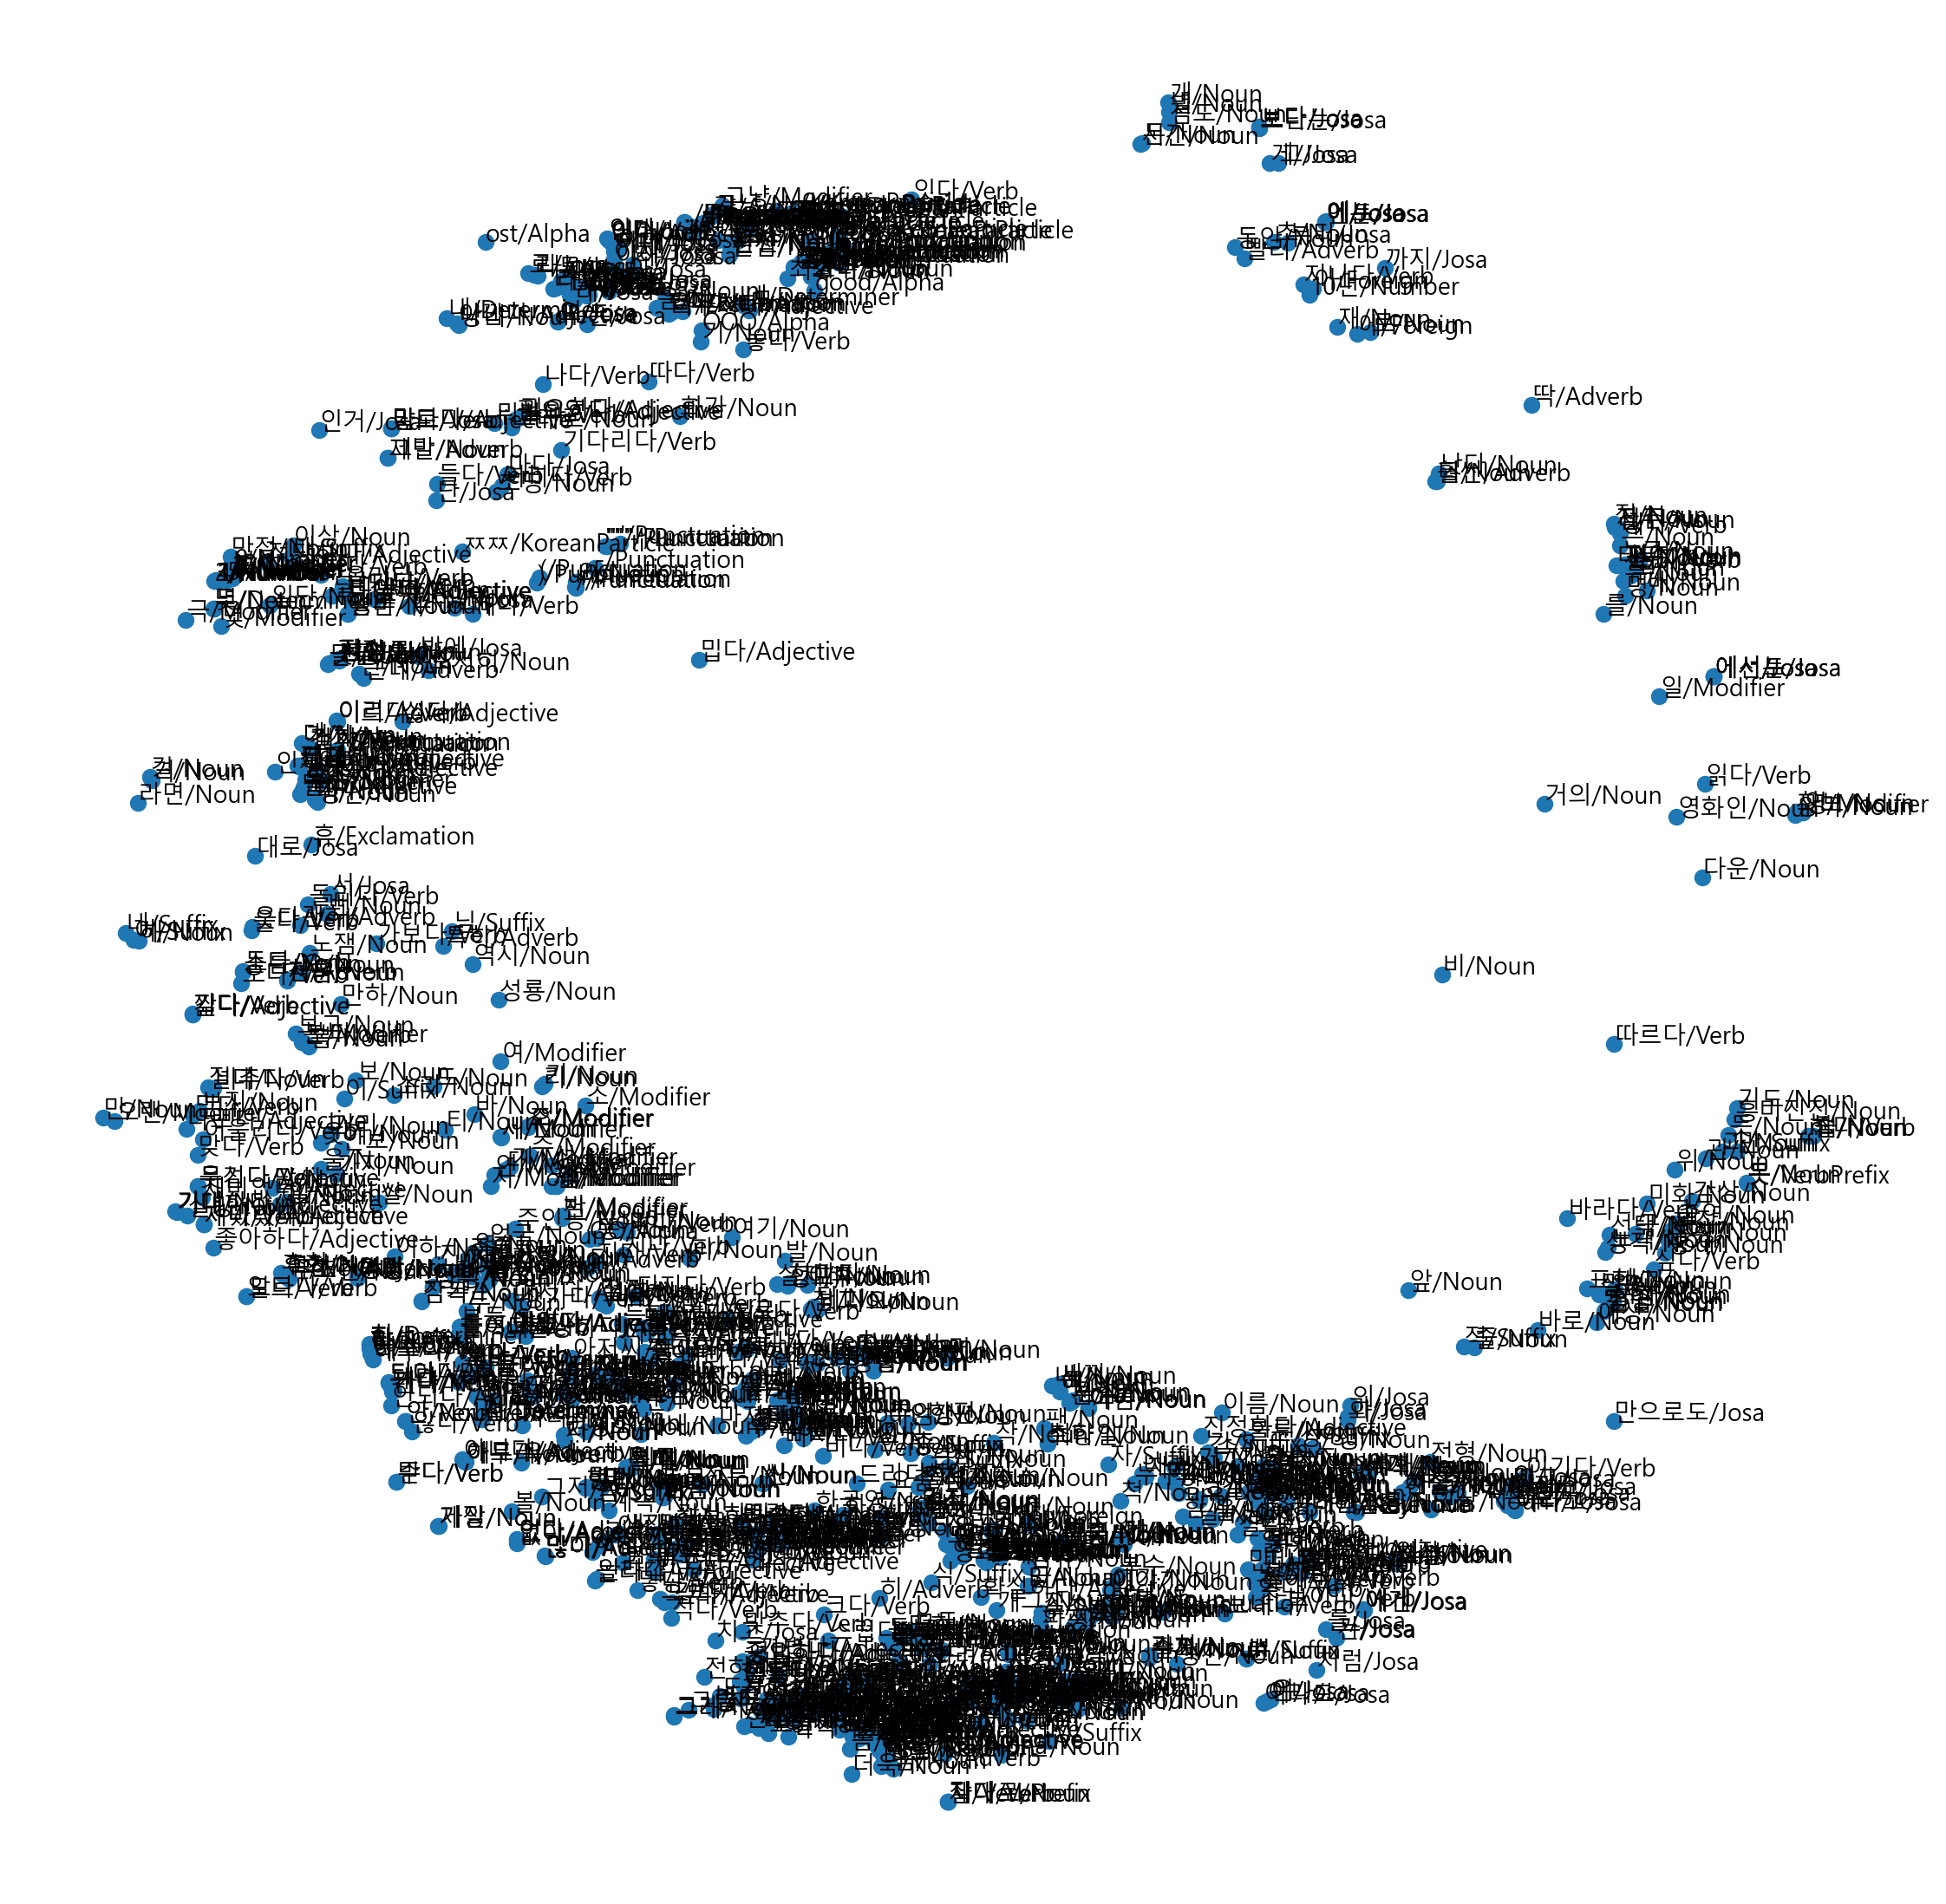

In [63]:
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(review_1000["x"], review_1000["y"])

for word, pos in review_1000.iterrows():
    ax.annotate(word, pos)
ax.axis("off")

# 순환 신경망 (Recurrent Neural Network, RNN)

- **순서가 있는 데이터**를 입력으로 받음

- 변화하는 입력에 대한 출력을 얻음

- 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터**

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망

  - 입력 → 은닉 → 출력층 으로 이어지는 단방향 구조

  - 이전 스텝의 출력의 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조

  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  

  - 현재 상태가 이전 상태에 종속

  <br>

  <img src="https://www.researchgate.net/profile/Engin_Pekel/publication/315111480/figure/fig1/AS:472548166115333@1489675670530/Feed-forward-and-recurrent-ANN-architecture.png">

  <sub>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</sub>



## 순환 신경망 구조

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="700">

<br>

- 입력 $x_t$에서 $t$는 시각을 뜻함

- $X_0$에 대한 출력 $Y_0$이 다음 레이어에 전달

- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

## 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- one to one
  - RNN

- one to many
  - Image Captioning

  - 이미지에 대한 설명 생성

- many to one
  - Sentiment Classification

  - 문장의 긍정/부정을 판단하는 감정 분석

- many to many
  - Machine Translation

  - 하나의 언어를 다른 언어로 번역하는 기계 번역

- many to many
  - Video Classification(Frame Level)




## 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치

- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치

- $h$는 '상태'를 기억

- $h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## BPTT(BackPropagation Through Time)

- 시간 방향으로 펼친 신경망의 오차역전파

- 시계열 데이터의 시간 크기가 커지면 역전파 시 불안정해짐

- 기울기 소실 문제 발생

  <img src="https://iamtrask.github.io/img/backprop_through_time.gif" width="700">

  <sub>출처: https://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/</sub>

## Truncated BPTT

- 큰 시계열 데이터를 다룰 때 사용하는 오차역전파법

- 신경망을 **적당한 길이로 끊는다.**
  - <u>역전파에 연결만! 순전파의 연결은 끊어지지 않는다.</u>

- 학습 시, 입력이 **순서대로 연결**되어 입력해야 함

  <img src="https://r2rt.com/static/images/RNN_true_truncated_backprop.png">

  <sub>출처: https://r2rt.com/styles-of-truncated-backpropagation.html</sub>


## RNN 구현

- 형상 주의!

## $\qquad \ h_{t-1} W_h \ + \ x_t W_x = h_t$

- $h_{t-1}$ : $N \times H$

- $W_{h}$ : $H \times H$

- $x_{t}$ : $N \times D$

- $W_{x}$ : $D \times H$

- $h_t$ : $N \times H$

- $D$ : 입력 벡터의 차원 수

- $H$ : 은닉 상태 벡터의 차원 수


In [64]:
import numpy as np

class RNN:
    def __init__(self, W_x, W_h, b):
        self.params = [W_x, W_h, b]
        self.grads = [np.zeros_like(param) for param in self.params]

        self.temp = None
    
    def forward(self, input_data, h_prev):
        W_x, W_h, b = self.params
        t = np.matmul(h_prev, W_h) + np.matmul(input_data, W_x) + b
        h_next = np.tanh(t)

        self.temp = (input_data, h_prev, h_next)

        return h_next
    
    def backward(self, dh_next):
        W_x, W_h, b = self.params
        input_data, h_prev, h_next = self.temp

        dt = dh_next * (1 - h_next ** 2)
        db = np.sum(dt, axis=0)
        dW_h = np.matmul(h_prev.T, dt)
        dh_prev = np.matmul(dt, W_h.T)
        dW_x = np.matmul(input_data.T, dt)
        dx = np.matmul(dt, W_x.T)

        self.grads[0][...] = dW_x
        self.grads[1][...] = dW_h
        self.grads[2][...] = db

        return dx, dh_prev

## Time RNN Layer
- RNN 계층의 은닉상태 $h$를 가지고 있음


In [65]:
class TimeRNN:
    def __init__(self, W_x, W_h, b, stateful=False):
        self.params = [W_x, W_h, b]
        self.grads = [np.zeros_like(param) for param in self.params]
        self.layers = None
        self.hiddn_state = None
        self.dh = None
        self.stateful = stateful

    def set_state(self, hidden_state):
        self.hiddn_state = hidden_state
    
    def reset_state(self):
        self.hidden_state = None
    
    def forward(self, input_data):
        W_x, W_h, b = self.params
        N, T, D = input_data.shape
        D, H = W_x.shape

        self.layers = []
        output = np.empty((N, T, H), dtype="f")

        if not self.stateful or self.hidden_state is None:
            self.hidden_state = np.zeros((N, H), dtype="f")
        
        for t in range(T):
            layer = RNN(*self.params)
            self.hidden_state = layer.forward(input_data[:, t, :], self.h)
            output[:, t, :] = self.hidden_state
            self.layers.append(layer)
        
        return output
    
    def backward(self, doutput):
        W_x, W_h, bias = self.params
        N, T, H = doutput.shape
        D, H = W_x.shape

        dinput = np.empty((N, T, D), dtype="f")
        dh = 0
        grads = np.zeros(3, dtype="f")

        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(doutput[:, t:, :] + dh)
            dinput[:, t, :] = dx

            for idx, grad in enumerate(layer.grads):
                grads[idx] += grad
        
        for idx, grad in enumerate(grads):
            self.grads[idx][...] = grad
        
        self.dh = dh

        return dinput

# LSTM (Long Shot-Term Memory)

- RNN은 장기 기억을 제대로 처리 못함

- RNN은 기울기 소실 또는 기울기 폭발을 발생

- 위를 해결하기 위해 LSTM 방법 등장

  <img src="https://www.researchgate.net/publication/324600237/figure/fig3/AS:616974623178753@1524109621725/Long-Short-term-Memory-Neural-Network.png" width="600">

<sub>출처: https://www.researchgate.net/figure/Long-Short-term-Memory-Neural-Network_fig3_324600237</sub>

### $\qquad f = \sigma (x_t W^{(f)}_x + h_{t-1} W^{(f)}_h + b^{(f)} \\
\qquad g = tanh(x_t W^{(g)}_x + h_{t-1} W^{(g)}_h + b^{(g)}) \\
\qquad i = \sigma(x_t W^{(i)}_x + h_{t-1} W^{(i)}_h + b^{(i)}) \\
\qquad o = tanh(x_t W^{(o)}_x + h_{t-1} W^{(o)}_h + b^{(o)})$


### $\qquad c_t = f \odot c_{t-1} + g \odot i \\
\qquad h_t = o \odot tanh(c_t)
$


## forget gate (망각 게이트)
- 불필요한 정보를 잊는 게이트

-  $h_{t−1}$ 과 $x_t$ 를 받아 시그모이드를 취해준 값이 forget gate의 출력값

- 시그모이드 함수를 통과하기 때문에 그 값이 0이라면 이전 상태의 정보는 잊고, 1이라면 이전 상태의 정보를 온전히 기억

  <img src="https://image.slidesharecdn.com/dlsl2017d2l2recurrentneuralnetworksi-170125171004/95/recurrent-neural-networks-i-d2l2-deep-learning-for-speech-and-language-upc-2017-25-638.jpg?cb=1485365064" width="600">

  <sub>출처: https://www.slideshare.net/xavigiro/recurrent-neural-networks-1-d2l2-deep-learning-for-speech-and-language-upc-2017</sub>

## input gate (입력 게이트)
- 현재 정보를 기억하기’ 위한 게이트

- $h_{t−1}$ 과 $x_t$를 받아 $Sigmoid$ -> $tanh$ 를 통과한 다음,  
  Hadamard product 연산을 한 값을 출력
  
  <br>

  <img src="https://image.slidesharecdn.com/dlmmdcud2l08recurrentneuralnetworks-170429103823/95/recurrent-neural-networks-d2l8-insightdcu-machine-learning-workshop-2017-28-638.jpg?cb=1493462658" width="600">

  <sub>출처: https://www.slideshare.net/xavigiro/recurrent-neural-networks-1-d2l2-deep-learning-for-speech-and-language-upc-2017</sub>

## output gate (출력 게이트)

- 은닉 상태 $h_t$의 출력을 담당하는 게이트

- 입력 $x_t$와 이전 상태 $h_{t-1}$로부터 게이트의 열림 상태가 결정됨

  <img src="https://image.slidesharecdn.com/dlcvd2l6recurrentneuralnetworks-160802094750/95/deep-learning-for-computer-vision-recurrent-neural-networks-upc-2016-30-638.jpg?cb=1470131837" width="600">

<sub>출처: https://www.slideshare.net/xavigiro/deep-learning-for-computer-vision-recurrent-neural-networks-upc-2016</sub>

## LSTM 구현

In [67]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LSTM:
    def __init__(self, W_x, W_h, b):
        self.params = [W_x, W_h, b]
        self.grads = [np.zeros_like(param) for param in self.params]
        self.temp = None

    def forward(self, x, h_prev, c_prev):
        W_x, W_h, b = self.params
        N, H = h_prev.shape

        A = np.dot(x, W_x) + np.dot(h_prev, W_h) + b

        f = A[:, :H]
        g = A[:, H:2*H]
        i = A[:, 2*H:3*H]
        o = A[:, 3*H:]

        f = sigmoid(f)
        g = np.tanh(g)
        i = sigmoid(i)
        o = sigmoid(o)

        c_next = f * c_prev + g * i
        h_next = o * np.tanh(c_next)

        self.temp = (x, h_prev, c_prev, i, f, g, o, c_next)

        return h_next, c_next
    
    def backward(self, dh_next, dc_next):
        W_x, W_h, b = self.params
        x, h_prev, c_prev, i, f, g, o, c_next = self.temp

        tanh_c_next = np.tanh(c_next)

        ds = dc_next + (dh_next * c) * (1 - tanh_c_next ** 2)
        dc_prev = ds * f

        di = ds * g
        df = ds * c_prev
        do = dh_next * tanh_c_next
        dg = ds * di

        di *= i * (1 - i)
        df *= f * (1 - f)
        do *= o * (1 - o)
        dg *= (1 - g ** 2)

        dA = np.hstack((df, dg, di, do))
        
        dW_h = np.dot(h_prev.T, dA)
        dW_x = np.dot(x.T, dA)
        db = dA.sum(axis=0)

        self.grads[0][...] = dW_x
        self.grads[1][...] = dW_h
        self.grads[2][...] = db

        dx = np.dot(dA, W_x.T)
        dh_prev = np.dot(dA, W_h.T)

        return dx, dh_prev, dc_prev

# GRU (Gated Recurrent Unit)
- LSTM을 더 단순하게 만든 구조

- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- update gate
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함
  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub>출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>

  ### $\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$


# (참고) RNN vs LSTM vs GRU

<img src="https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_1849/http://dprogrammer.org/wp-content/uploads/2019/04/RNN-vs-LSTM-vs-GRU.png">

<sub>출처: http://dprogrammer.org/rnn-lstm-gru</sub>